PACKAGE IMPORT

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA IMPORT

In [18]:
df=pd.read_csv('winequality-red.csv')
df['category']=8
for i in range(df.shape[0]):
    if df.loc[i,'quality']>=7:
        df.loc[i,'category']=1
    else:
        df.loc[i,'category']=0
dff=df.drop('quality',axis=1)

CHECKING CORRELATION

<Axes: >

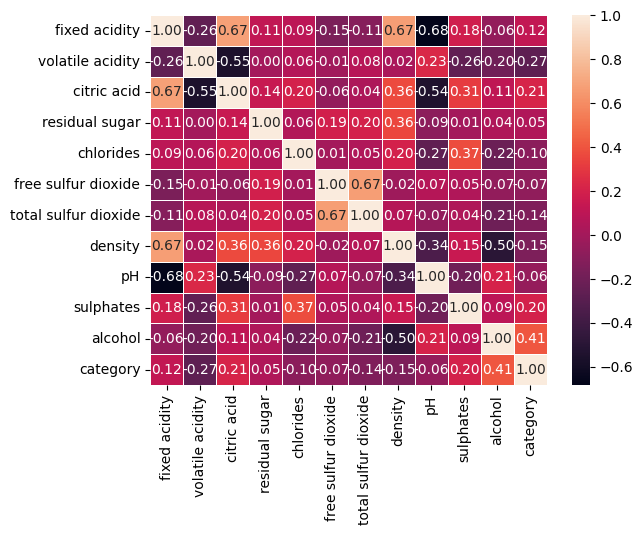

In [19]:

corr = dff.corr(method = 'pearson')

sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)

OUTLINERS

In [20]:
Q1=dff["alcohol"].quantile(0.25)
Q2=dff["alcohol"].quantile(0.75)
upper=Q2+1.5*(Q2-Q1)
lower=Q2-1.5*(Q2-Q1)
dff1=dff[(df["alcohol"]>lower)&(df["alcohol"]<upper)]



DATA

In [21]:
X = dff1.drop(['category'], axis =1 )
Y = dff1['category']


PREPROCESSING

In [22]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split
ss=StandardScaler()    
X_std=ss.fit_transform(X)



DATA SPLITTING

In [33]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X_std,Y,test_size=0.15,random_state=42)


LOGISTIC REGRESSION

In [230]:
from sklearn.linear_model import LogisticRegression as LR 
logistic_model=LR()
logistic_model.fit(x_train,y_train)                                                                     
y_outL=logistic_model.predict(x_test)






KNN


In [233]:
from sklearn.neighbors import KNeighborsClassifier  
KNN_model= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
KNN_model.fit(x_train, y_train)
y_outK=KNN_model.predict(x_test)


DECISION TREE CLASSIFIER

In [234]:
from sklearn.tree import DecisionTreeClassifier
DSS_model=DecisionTreeClassifier(random_state=2)
DSS_model.fit(x_train,y_train)
y_outD=DSS_model.predict(x_test)


RANDOM FOREST CLASSIFIER

In [238]:
from sklearn.ensemble import RandomForestClassifier
RFC_model= RandomForestClassifier(n_estimators=58,   min_samples_split=4, random_state=0)
RFC_model.fit(x_train, y_train)
y_outR=RFC_model.predict(x_test)



LOGISTIC REGRESSION FROM SCRATCH

In [222]:
X1 =dff['alcohol'].to_numpy().reshape(-1,1)
X2=dff['sulphates'].to_numpy().reshape(-1,1)
X3 =dff['volatile acidity'].to_numpy().reshape(-1,1)
X4 =dff['citric acid'].to_numpy().reshape(-1,1)
Y1 =dff['category'].to_numpy().reshape(-1,1)
X1=np.hstack([X1,X2,X3,X4])
#scaling
from sklearn.preprocessing import MinMaxScaler,Normalizer
scaler=Normalizer()
X1_std=ss.fit_transform(X1)
#spiliting
x1_train,x1_test,y1_train,y1_test=tts(X1_std,Y1,test_size=0.15, random_state=42)
m=x1_train.shape[0]



array([[-0.77251161,  0.01092425,  0.17976995, -0.98066858],
       [-0.86637886, -1.05131114, -0.15541864, -0.51851442],
       [-0.49090986,  1.89934271,  0.79428237, -0.26176211],
       [-0.58477711, -0.69723268, -0.37887771,  0.20039205],
       [ 0.16616088, -0.34315421, -0.37887771, -0.15906119],
       [-0.96024611, -0.81525883, -0.65820153,  0.14904159],
       [-0.67864436, -0.40216729,  0.06804042, -0.05636026],
       [-0.39704261, -1.11032421,  1.4087948 , -0.98066858],
       [-0.58477711,  0.48302886, -0.76993107,  0.55984528],
       [ 0.44776263,  0.01092425,  0.45909378, -0.82661719],
       [ 1.29256787,  0.01092425, -0.09955388,  1.8949573 ],
       [-0.44397624, -0.16611498,  1.29706527, -1.28877135],
       [-0.67864436, -0.10710191, -0.26714817, -0.98066858],
       [-1.1479806 , -0.40216729,  0.17976995, -0.72391627],
       [-0.96024611, -0.40216729, -1.04925489,  0.50849482],
       [ 1.76190411, -0.6382196 , -1.38444349,  0.91929852],
       [-0.30317536, -0.

In [185]:
def sigmoid(x1_train,theta,b):
    z=np.dot(x1_train,theta)+b
    y=1/(1+np.exp(-z))
    return y

In [186]:
def cost(y1_train,y_out):
    predict_1 = y1_train * np.log(y_out)
    predict_0 = (1 - y1_train) * np.log(1 - y_out)
    cf=-(predict_0+predict_1).mean()
    return cf

In [187]:
def gd(x1_train,y1_train,m,theta,learning_rate,b):
    y_out=sigmoid(x1_train,theta,b)
    dw = (1 / m) * ( np.dot(x1_train.T, (y1_train - y_out)))
    db = (1 / m) * ( np.sum(y1_train- y_out))

    theta =learning_rate * dw
    b = learning_rate * db

    return theta,b

In [218]:
theta=np.random.random((4, 1))
b=np.random.random()
learning_rate=0.005
noche=10000

L=[]

for i in range(noche):
    theta,b=gd(x1_train,y1_train,m,theta,learning_rate,b)
    y_out=sigmoid(x1_train,theta,b).reshape(-1,1)
    L.append(cost(y1_train,y_out))

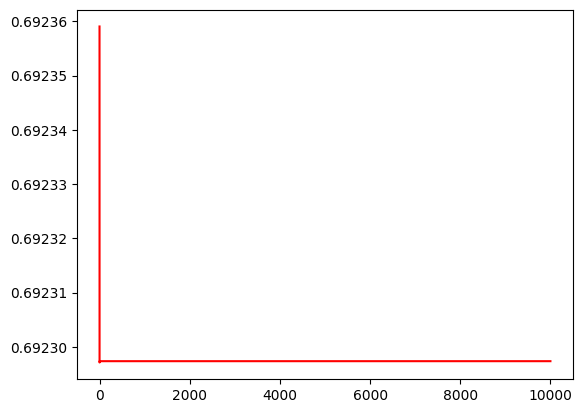

In [219]:
plt.plot(L,"r")


In [223]:
def predict(x1_test):
    hypothesis= sigmoid(x1_test,theta,b)
    return [1 if val >= 0.5 else 0 for val in hypothesis]

In [226]:
y_predict=predict(x1_test)

Accuracy Check

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

LOGISTIC REGRESSION

In [231]:
accuracy = accuracy_score(y_test,y_outL)*100
f1=f1_score(y_test,y_outL)
confusion_mat = confusion_matrix(y_test,y_outL)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)
print(f"F1 score is {f1}")

Accuracy is 92.82700421940928
Confusion Matrix
[[204   5]
 [ 12  16]]
F1 score is 0.6530612244897959


KNN

In [236]:
accuracy = accuracy_score(y_test,y_outK)*100
confusion_mat = confusion_matrix(y_test,y_outK)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)
f1=f1_score(y_test,y_outK)
print(f"F1 score is {f1}")

Accuracy is 93.67088607594937
Confusion Matrix
[[203   6]
 [  9  19]]
F1 score is 0.7169811320754718


DSS

In [239]:
accuracy = accuracy_score(y_test,y_outD)*100
confusion_mat = confusion_matrix(y_test,y_outD)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)
f1=f1_score(y_test,y_outD)
print(f"F1 score is {f1}")

Accuracy is 90.29535864978902
Confusion Matrix
[[192  17]
 [  6  22]]
F1 score is 0.6567164179104477


RFC

In [241]:
accuracy = accuracy_score(y_test,y_outR)*100
confusion_mat = confusion_matrix(y_test,y_outR)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)
f1=f1_score(y_test,y_outR)
print(f"F1 score is {f1}")

Accuracy is 94.09282700421942
Confusion Matrix
[[205   4]
 [ 10  18]]
F1 score is 0.7200000000000001


SCRATCH LR

In [242]:
accuracy = accuracy_score(y1_test,y_predict)*100
confusion_mat = confusion_matrix(y1_test,y_predict)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)
f1=f1_score(y1_test,y_predict)
print(f"F1 score is {f1}")

Accuracy is 85.41666666666666
Confusion Matrix
[[195   8]
 [ 27  10]]
F1 score is 0.36363636363636365
